In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from parameters_dict import physics_parameters
from exp_analysis_class import exp_analysis
from exp_analysis import gamma_heavy, gamma_heavy_integrated

In [3]:
physics_parameters['heavy']

{'m4_limits': (0.005, 1),
 'mz_limits': (0.005, 10),
 'm4_scan': [0.01, 0.1, 0.5],
 'mz_scan': [0.01, 0.1, 1, 5],
 'alpha_dark': 0.4,
 'Umu4': 2.2e-07,
 'epsilon2': 0.00046,
 'alpha_em': 0.0072992700729927005,
 'span_2d': 9.945025,
 'Vmu4_alpha_epsilon2': 2.9547445255474454e-13}

In [8]:
case = 'heavy'
produce_samples = False
save_folder = ('../fig/control_checks_miniboone/comparison_with_truth/' + case + '/')
!mkdir -p $save_folder
my_exp_analysis = exp_analysis(case, '../data/miniboone/3plus1/')

/bin/bash: port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_port_used'
/bin/bash: wait_until_port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_wait_until_port_used'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_module'
/bin/bash: find_port: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_find_port'
/bin/bash: random_number: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_random_number'
/bin/bash: helmod: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_helmod'
/bin/bash: source_helpers: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_source_h

In [12]:
my_exp_analysis.load_df_base(1000000)

material = hydrogen, 0
material = oxygen, 0
material = carbon, 622839
material = copper, 0
material = zinc, 0
material = lead, 0


In [6]:
#generation part
if produce_samples:
    for m4, mz_prime in itertools.product(physics_parameters[case]['m4_scan'], physics_parameters[case]['mz_scan']):
        print(m4, mz_prime)
        dark_gen_run = f'cd ..; python dark_gen.py --M4 {m4} --mzprime {mz_prime} '\
                       f'--UMU4 {physics_parameters[case]["Umu4"]} '\
                       f'--alpha_dark {physics_parameters[case]["alpha_dark"]} '\
                       f'--epsilon2 {physics_parameters[case]["epsilon2"]} '\
                       f'--neval 100000 --noplot --hierarchy {case}_mediator '\
                       f'--exp miniboone'
        stream = os.popen(dark_gen_run)
        print(stream.read())

0.01 0.01
ERROR! Mass spectrum not allowed.

0.01 0.1
Model used 3+1
5136.0231493447045

0.01 1
Model used 3+1
1.547688711254031

0.01 5
Model used 3+1
0.002861616278283635

0.1 0.01
Model used 3+1
183.97353935763758

0.1 0.1
ERROR! Mass spectrum not allowed.

0.1 1
Model used 3+1
1.5156857505634314

0.1 5
Model used 3+1
0.002392408739098699

0.5 0.01
Model used 3+1
0.2011866070099302

0.5 0.1
Model used 3+1
8.224166824655897e-06

0.5 1
Model used 3+1
0.3249854339818965

0.5 5
Model used 3+1
0.0006285804546674528



In [13]:
material = 'carbon'

aux_gamma = []
aux_sigma = []
aux_n_evt = []
for m4 in physics_parameters[case]['m4_scan']:
    aux_gamma.append([])
    aux_sigma.append([])
    aux_n_evt.append([])
    for mz in physics_parameters[case]['mz_scan']:
        if ((case == 'heavy') and (m4 >= mz)) or ((case == 'light') and (m4 <= mz)):
                aux_gamma[-1].append(0)
                aux_sigma[-1].append(0)
                aux_n_evt[-1].append(0)
                continue
        else:
            df = my_exp_analysis.load_df(m4, mz)
            aux_gamma[-1].append(df['weight_decay', ''][df[material, '']].sum())
            aux_sigma[-1].append(df['adjusted_weight', ''][df[material, '']].sum())
            aux_n_evt[-1].append(df['actual_weight', ''].sum())

aux_gamma = np.array(aux_gamma)
aux_sigma = np.array(aux_sigma)
aux_n_evt = np.array(aux_n_evt)

material = hydrogen, 0
material = oxygen, 0
material = carbon, 60861
material = copper, 0
material = zinc, 0
material = lead, 0
material = hydrogen, 0
material = oxygen, 0
material = carbon, 60837
material = copper, 0
material = zinc, 0
material = lead, 0
material = hydrogen, 0
material = oxygen, 0
material = carbon, 60742
material = copper, 0
material = zinc, 0
material = lead, 0
material = hydrogen, 0
material = oxygen, 0
material = carbon, 60919
material = copper, 0
material = zinc, 0
material = lead, 0
material = hydrogen, 0
material = oxygen, 0
material = carbon, 61038
material = copper, 0
material = zinc, 0
material = lead, 0
material = hydrogen, 0
material = oxygen, 0
material = carbon, 60080
material = copper, 0
material = zinc, 0
material = lead, 0
material = hydrogen, 0
material = oxygen, 0
material = carbon, 61193
material = copper, 0
material = zinc, 0
material = lead, 0


In [14]:
# produce the gamma profile
mask = my_exp_analysis.df_base[material, '']
m4_values = my_exp_analysis.df_base['m4', ''][mask].values
mz_values = my_exp_analysis.df_base['mzprime', ''][mask].values
weight_decay_values = my_exp_analysis.df_base['weight_decay', ''][mask].values

m4_span = physics_parameters[case]['m4_scan']
mz_span = np.linspace(*physics_parameters[case]['mz_limits'], 18)
grid_to_eval = np.stack(np.meshgrid(m4_span, mz_span, indexing='ij'), axis=-1)
df_values = np.stack([m4_values, mz_values], axis=-1)

bin_width_m4 = 0.01
bins = 50
bin_range = [0.05, 10]
bin_size = (bin_range[1] - bin_range[0])/bins * bin_width_m4

smoothing_pars = [0.005, 0.05]
this_kde_weights = exp_analysis.kde_Nd_weights(grid_to_eval, df_values, smoothing=smoothing_pars, kernel='epa')
final_weights = this_kde_weights * weight_decay_values[:, np.newaxis, np.newaxis]
gamma_grid = np.sum(final_weights, axis=0)
gamma_std_grid = np.sqrt(np.sum(final_weights**2, axis=0))

for i, m4 in enumerate(physics_parameters[case]['m4_scan']):
    print(f"m4 = {m4}")
    plt.plot(physics_parameters[case]['mz_scan'], aux_gamma[i], 'o', label='Generated without scanning')
    gamma_formula = []
    for mz in physics_parameters[case]['mz_scan']:
        gamma_formula.append(gamma_heavy(m4, mz, physics_parameters[case]['Vmu4_alpha_epsilon2']))
    plt.plot(physics_parameters[case]['mz_scan'], gamma_formula, 'o', label='Computed')
    gamma_est = gamma_grid[i]
    gamma_std = gamma_std_grid[i]
    plt.plot(mz_span, gamma_est, label=f'kde 2d, $k_{{m_4}}$={smoothing_pars[0]:.2g}, $k_{{m_Z}}$={smoothing_pars[1]:.2g}')
    plt.fill_between(mz_span, gamma_est-gamma_std, gamma_est+gamma_std, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)

    this_mask = (m4_values > (m4-bin_width_m4/2)) & (m4_values < (m4+bin_width_m4/2))
    
    out = plt.hist(mz_values[this_mask], bins=bins, range=bin_range,
                weights=weight_decay_values[this_mask]/bin_size,
                histtype='step', label='histogram')

    plt.legend(frameon=False, loc='upper right')
    plt.xlim(mz_values[this_mask].min(), mz_values[this_mask].max())
    plt.xlabel(r"$M_Z'$ [GeV]")
    plt.ylabel('Decay rate [GeV]')
    plt.yscale('log')
#     plt.xscale('log')
#     plt.ylim(0, 1e-12)
    # plt.xlim(bin_range)
    plt.title(f'N random = {my_exp_analysis.n_evt}\n{case} mediator, $m_4$ = {m4} GeV, only {material}')
    plt.tight_layout()
#     break
    plt.savefig(save_folder+f'gamma_{material}_nevt_{my_exp_analysis.n_evt}_m4_{m4}.png', dpi=250)
    plt.close()

m4 = 0.01
m4 = 0.1
m4 = 0.5


In [15]:
gamma_formula = []
gamma_kde = []
m4 = []
mz = []

smoothing_pars = [0.005, 0.05]

for i, m4 in enumerate(physics_parameters[case]['m4_scan']):
    gamma_formula.append([])
    gamma_kde.append([])
    for j, mz in enumerate(physics_parameters[case]['mz_scan']):
        if ((case == 'heavy') and (m4 >= mz)) or ((case == 'light') and (m4 <= mz)):
                gamma_formula[-1].append(0)
                gamma_kde[-1].append(0)
                continue
        gamma_formula[-1].append(gamma_heavy(m4, mz, physics_parameters[case]['Vmu4_alpha_epsilon2']))
        aux_kde = exp_analysis.kde_Nd_weights(np.array([m4, mz]), df_values, smoothing=smoothing_pars, kernel='epa')
        gamma_kde[-1].append((aux_kde*weight_decay_values).sum())

gamma_formula = np.array(gamma_formula)
gamma_kde = np.array(gamma_kde)

<ipython-input-16-689466eb2dec>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio_gamma_formula = gamma_formula/aux_gamma
<ipython-input-16-689466eb2dec>:31: RuntimeWarning: invalid value encountered in true_divide
  ratio_gamma_kde = gamma_kde/aux_gamma
<ipython-input-16-689466eb2dec>:51: RuntimeWarning: invalid value encountered in true_divide
  ratio_kde_formula = gamma_kde/gamma_formula


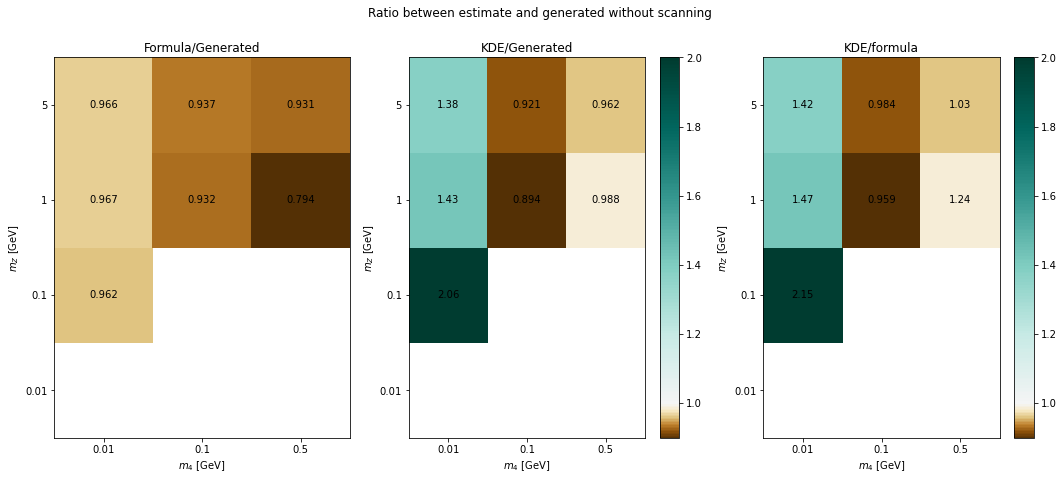

In [16]:
from matplotlib import colors

xlabel = r'$m_4$ [GeV]'
ylabel = r'$m_Z$ [GeV]'

xcenters = physics_parameters[case]['m4_scan']
ycenters = physics_parameters[case]['mz_scan']
fig = plt.figure(figsize=(18, 7))
fig.suptitle('Ratio between estimate and generated without scanning')

plt.subplot(131)
ratio_gamma_formula = gamma_formula/aux_gamma
divnorm = colors.TwoSlopeNorm(vcenter=1, vmin=0.9, vmax=2)
plt.pcolormesh(ratio_gamma_formula.T, cmap='BrBG', norm=divnorm)
plt.xticks(ticks=np.arange(0.5, len(xcenters)),
           labels=xcenters)
plt.yticks(ticks=np.arange(0.5, len(ycenters)),
           labels=ycenters)
for i in range(len(xcenters)):
    for j in range(len(ycenters)):
        this_value = ratio_gamma_formula[i,j]
        if np.isnan(this_value):
            continue
        text = plt.text(i + 0.5, j + 0.5, f"{ratio_gamma_formula[i,j]:.3g}",
                        ha="center", va="center", color="k")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Formula/Generated')

plt.subplot(132)
ratio_gamma_kde = gamma_kde/aux_gamma
plt.pcolormesh(ratio_gamma_kde.T, cmap='BrBG', norm=divnorm)
plt.xticks(ticks=np.arange(0.5,len(xcenters)),
           labels=xcenters)
plt.yticks(ticks=np.arange(0.5,len(ycenters)),
           labels=ycenters)
for i in range(len(xcenters)):
    for j in range(len(ycenters)):
        this_value = ratio_gamma_formula[i,j]
        if np.isnan(this_value):
            continue
        text = plt.text(i + 0.5, j + 0.5, f"{ratio_gamma_kde[i,j]:.3g}",
                        ha="center", va="center", color="k")
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('KDE/Generated')


plt.subplot(133)
ratio_kde_formula = gamma_kde/gamma_formula
plt.pcolormesh(ratio_gamma_kde.T, cmap='BrBG', norm=divnorm)
plt.xticks(ticks=np.arange(0.5,len(xcenters)),
           labels=xcenters)
plt.yticks(ticks=np.arange(0.5,len(ycenters)),
           labels=ycenters)
for i in range(len(xcenters)):
    for j in range(len(ycenters)):
        this_value = ratio_kde_formula[i,j]
        if np.isnan(this_value):
            continue
        text = plt.text(i + 0.5, j + 0.5, f"{ratio_kde_formula[i,j]:.3g}",
                        ha="center", va="center", color="k")
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('KDE/formula')


plt.savefig(save_folder + 'ratio_between_estimates_of_gamma.png', dpi=250)

In [17]:
# produce the sigma profile
smoothing_pars = [0.01, 0.1]
this_kde_weights = exp_analysis.kde_Nd_weights(grid_to_eval, df_values, smoothing=smoothing_pars, kernel='epa')
adjusted_weight = my_exp_analysis.df_base['adjusted_weight', ''][mask].values
final_weights = this_kde_weights * adjusted_weight[:, np.newaxis, np.newaxis]
sigma_grid = np.sum(final_weights, axis=0)
sigma_std_grid = np.sqrt(np.sum(final_weights**2, axis=0))

bin_width_m4 = 0.01
bins = 20
bin_range = [0.05, 10]
bin_size = (bin_range[1] - bin_range[0])/bins * bin_width_m4

for i, m4 in enumerate(physics_parameters[case]['m4_scan']):
    print(f"m4 = {m4}")
    plt.plot(physics_parameters[case]['mz_scan'], aux_sigma[i], 'o', label='Generated without scanning')
    sigma_est = sigma_grid[i]
    sigma_std = sigma_std_grid[i]
    plt.plot(mz_span, sigma_est, label=f'kde 2d, $k_{{m_4}}$={smoothing_pars[0]:.2g}, $k_{{m_Z}}$={smoothing_pars[1]:.2g}')
    plt.fill_between(mz_span, sigma_est-sigma_std, sigma_est+sigma_std, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)

    this_mask = (m4_values > (m4-bin_width_m4/2)) & (m4_values < (m4+bin_width_m4/2))

    out = plt.hist(mz_values[this_mask], bins=bins, range=bin_range,
                weights=adjusted_weight[this_mask]/bin_size,
                histtype='step', label='histogram')

    plt.legend(frameon=False, loc='upper right')
    plt.xlabel(r"$M_Z'$ [GeV]")
    plt.ylabel('Cross section [GeV$^{-2}$]')
    plt.yscale('log')
#     plt.ylim(0, 1.2*max(sigma_est))
#     plt.xlim(bin_range)
    plt.title(f'N random = {my_exp_analysis.n_evt}\n{case} mediator, $m_4$ = {m4} GeV, only {material}')
    plt.tight_layout()
    plt.savefig(save_folder+f'sigma_{material}_nevt_{my_exp_analysis.n_evt}_m4_{m4}.png', dpi=250)
    plt.close()

m4 = 0.01
m4 = 0.1
m4 = 0.5


In [19]:
# produce the n_evt profile at different stages in the selection
actual_weight = my_exp_analysis.df_base['actual_weight', ''][mask].values
final_weights = this_kde_weights * actual_weight[:, np.newaxis, np.newaxis]
n_event_grid = np.sum(final_weights, axis=0)
n_event_std_grid = np.sqrt(np.sum(final_weights**2, axis=0))

bin_range = [mz_values[this_mask].min(), mz_values[this_mask].max()]
bin_span = (bin_range[1] - bin_range[0])
bin_span_m4 = (m4_values.max() - m4_values.min())
bin_width = bin_span/bins

ctau = 25
# for mask in ['trivial', 'selected', f'decay_in_tpc_{ctau}', f'total_selected_{ctau}']:
for i, m4 in enumerate(physics_parameters[case]['m4_scan']):
    plt.plot(physics_parameters[case]['mz_scan'], aux_n_evt[i], 'o', label='Generated without scanning')
    n_event_est = n_event_grid[i]
    n_event_std = n_event_std_grid[i]
    plt.plot(mz_span, n_event_est, label=f'kde 2d, $k_{{m_4}}$={smoothing_pars[0]:.2g}, $k_{{m_Z}}$={smoothing_pars[1]:.2g}')
    plt.fill_between(mz_span, n_event_est-n_event_std, n_event_est+n_event_std, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)

    this_mask = (m4_values > (m4-bin_width_m4/2)) & (m4_values < (m4+bin_width_m4/2))        

    out = plt.hist(mz_values[this_mask], bins=bins, range=bin_range,
                weights=actual_weight[this_mask]/bin_size,
                histtype='step', label='histogram')

    plt.legend(frameon=False, loc='upper right')
    plt.xlabel(r"$M_Z'$ [GeV]")
    plt.ylabel('Expected number of entries')
    plt.yscale('log')
    # plt.ylim(0, 1e-7)
    # plt.xlim(bin_range)
    plt.title(f'N random = {my_exp_analysis.n_evt}\n{case} mediator, $m_4$ = {m4} GeV, only {material}')
    plt.tight_layout()
    plt.savefig(save_folder+f'nevt_{my_exp_analysis.n_evt}_m4_{m4}.png', dpi=250)
    plt.close()